In [1]:
install.packages("igraph")
library(igraph)

library('igraph')
library('Matrix')
library('pracma')

install.packages('matrixStats')
library(matrixStats)


The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmpl7kOzr/downloaded_packages



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu





The downloaded binary packages are in
	/var/folders/c7/3fwnkxl54f79gq5l949_hmjh0000gn/T//Rtmpl7kOzr/downloaded_packages


1a. Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [2]:
probs = c(0.003, 0.004, 0.01, 0.05, 0.1)

[1] "Analytical mean of the degree distribution is : 3"
[1] "Simulated mean of the degree distribution is : 2.902"
[1] "Analytical variance of the  degree distribution is : 2.991"
[1] "Simulated variance of the  degree distribution is : 2.97537137137137"


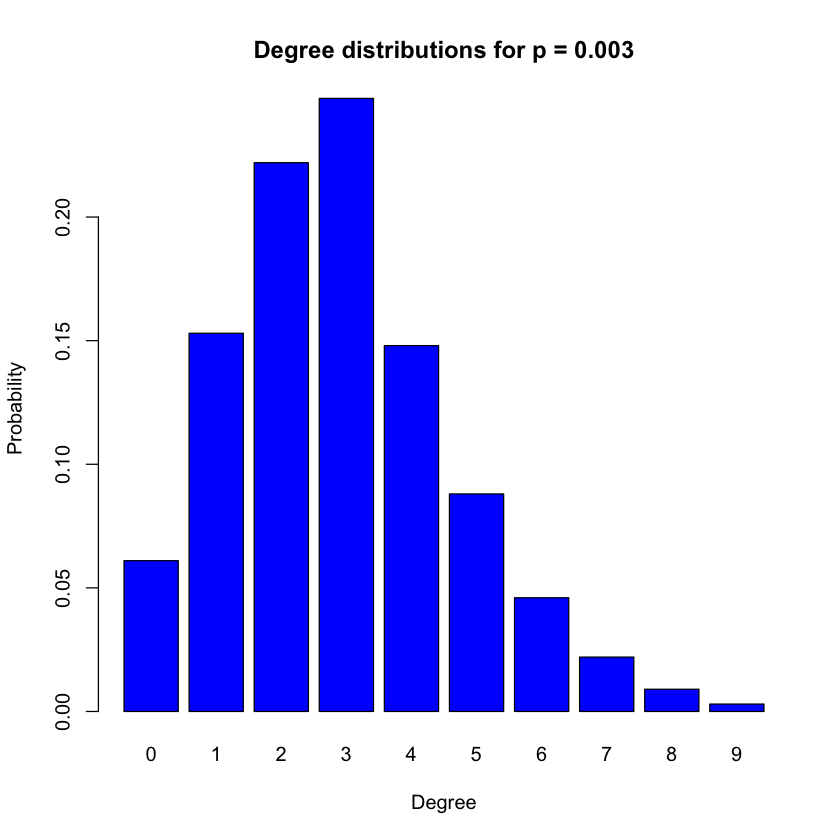

[1] "Analytical mean of the degree distribution is : 4"
[1] "Simulated mean of the degree distribution is : 4.248"
[1] "Analytical variance of the  degree distribution is : 3.984"
[1] "Simulated variance of the  degree distribution is : 4.38287887887888"


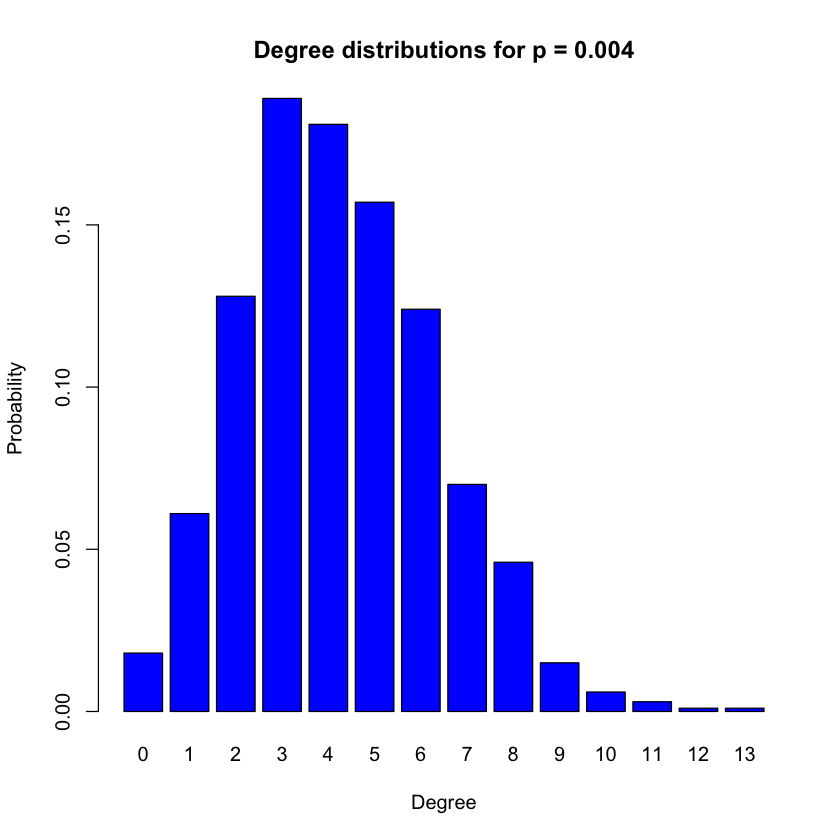

[1] "Analytical mean of the degree distribution is : 10"
[1] "Simulated mean of the degree distribution is : 10.048"
[1] "Analytical variance of the  degree distribution is : 9.9"
[1] "Simulated variance of the  degree distribution is : 10.5342302302302"


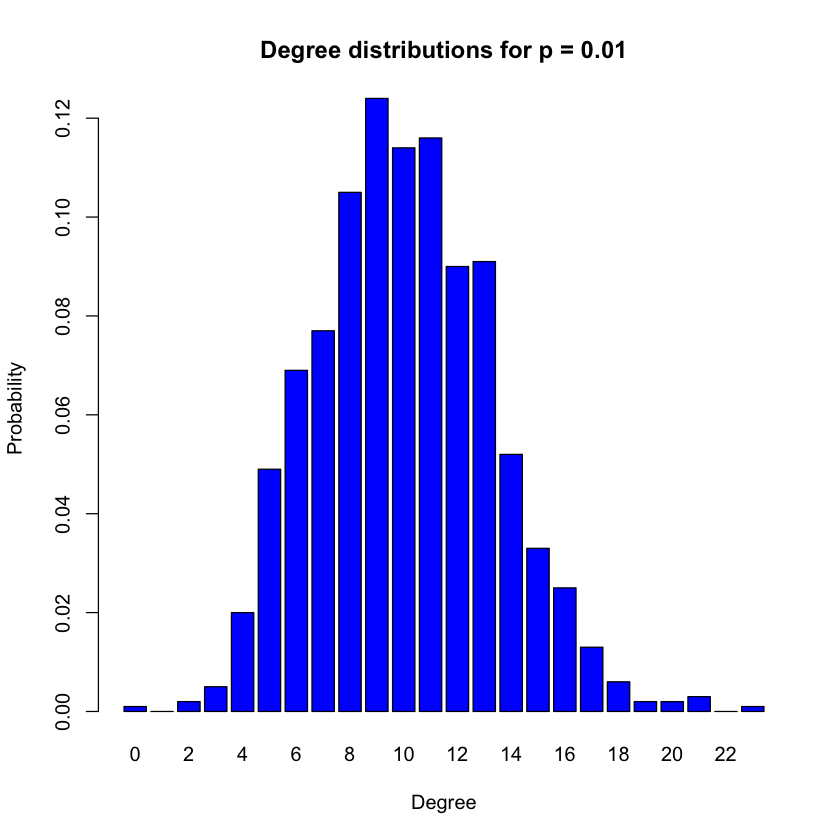

[1] "Analytical mean of the degree distribution is : 50"
[1] "Simulated mean of the degree distribution is : 49.294"
[1] "Analytical variance of the  degree distribution is : 47.5"
[1] "Simulated variance of the  degree distribution is : 46.2858498498499"


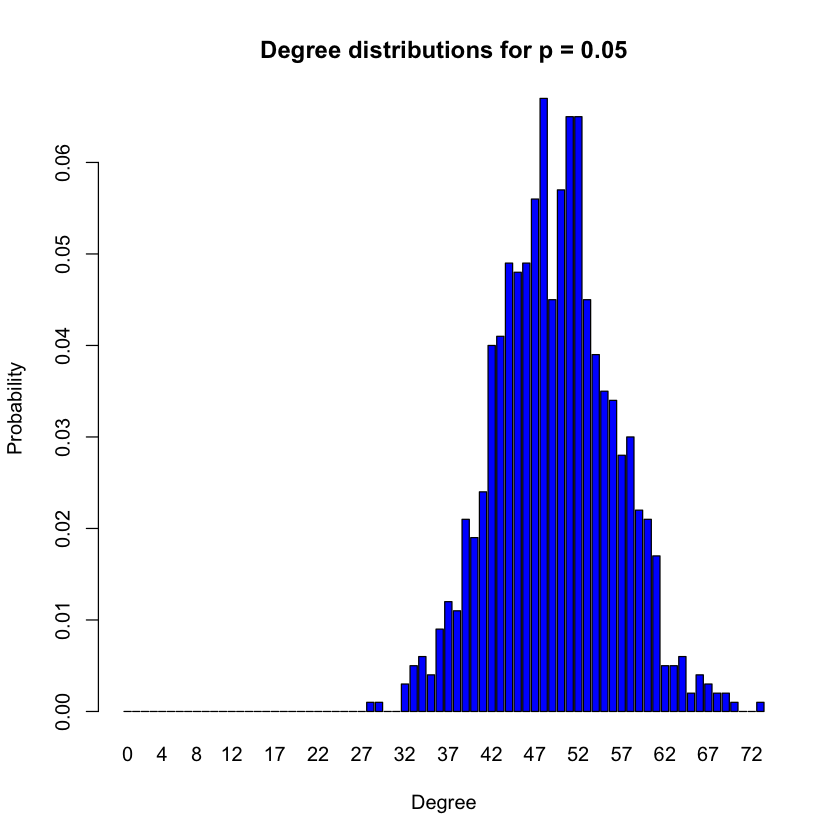

[1] "Analytical mean of the degree distribution is : 100"
[1] "Simulated mean of the degree distribution is : 99.958"
[1] "Analytical variance of the  degree distribution is : 90"
[1] "Simulated variance of the  degree distribution is : 87.9682042042042"


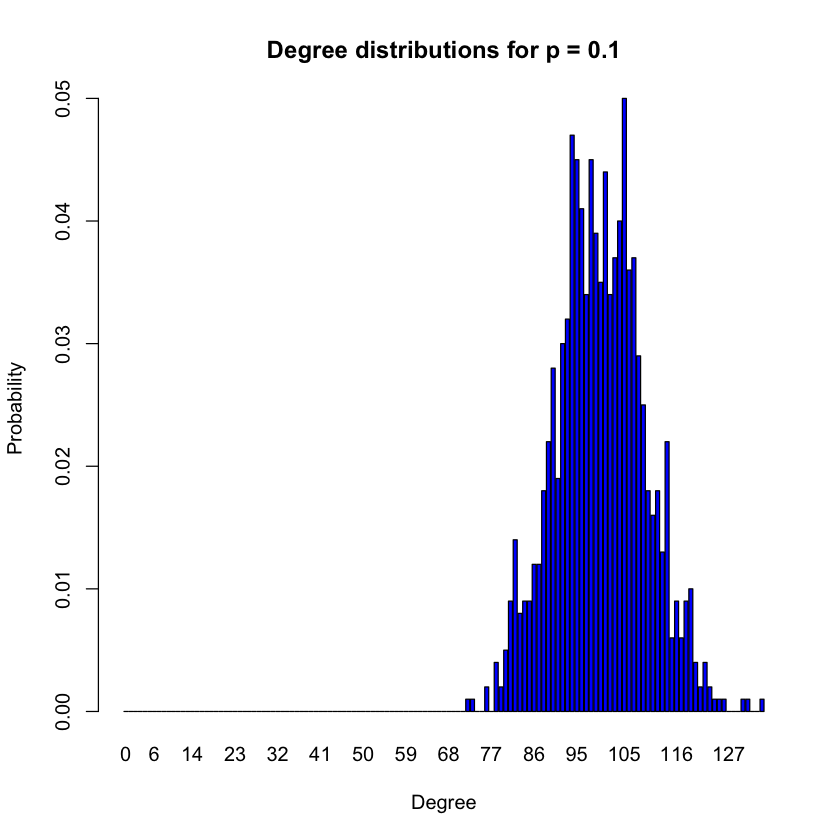

In [3]:
num_nodes <- 1000
for (p in probs){
    graph = sample_gnp(num_nodes, p, directed=FALSE)
    node_deg_dist = degree.distribution(graph)
    xVals = c(0: (length(node_deg_dist)-1))
    barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", p, sep = " "),col="blue")
    
    analytical_mean = num_nodes * p
    analytical_variance = num_nodes * p * (1-p)
    simulated_mean = mean(degree(graph))
    simulated_variance = var(degree(graph))
    print(paste("Analytical mean of the degree distribution is",":", analytical_mean))
    print(paste("Simulated mean of the degree distribution is",":", simulated_mean))
    print(paste("Analytical variance of the  degree distribution is",":", analytical_variance))
    print(paste("Simulated variance of the  degree distribution is",":", simulated_variance))
}

These are binomial distributions since a given node vi has n-1 possible nodes it can form an edge with where n is the total number of nodes in the network. Among these, it picks k nodes to form edges.

1b. For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. For one instance of the networks with that p, find the giant connected component (GCC) if not connected. What is the diameter of the GCC?

From the discussion sessions, there is a threshold where the nodes will likely be disconnected to them likely being fully connected. This threshold is $$ p < ln(n) \over n $$ for likely being disconnected and $$ p > ln(n) \over n $$ for likely beign connected.  Even above this threshold, there is still a possibility that a generated network will be disconnected. Hence, not all random realized networks are connected.

In [4]:
for (p in probs){
    connectedCount_dis = 0
    for(i in c(1:1000)) {
            temp_g = sample_gnp(num_nodes, p, directed = FALSE)
            if(is_connected(temp_g)) {
                connectedCount_dis = connectedCount_dis + 1
            }
        }
    connectivity_prob_dis = connectedCount_dis/1000
    print(paste("Estimated connectivity probability for p =",p,":", connectivity_prob_dis))
}

[1] "Estimated connectivity probability for p = 0.003 : 0"
[1] "Estimated connectivity probability for p = 0.004 : 0"
[1] "Estimated connectivity probability for p = 0.01 : 0.956"
[1] "Estimated connectivity probability for p = 0.05 : 1"
[1] "Estimated connectivity probability for p = 0.1 : 1"


In [12]:
for(p in probs){
    g = sample_gnp(1000, p, directed=FALSE)
    comps = clusters(g)
    idx = which.max(comps$csize)
    giant = subgraph(g, which(comps$membership == idx))
    print(paste("Diameter for p =",p,":", diameter(giant)))
}

[1] "Diameter for p = 0.003 : 14"
[1] "Diameter for p = 0.004 : 11"
[1] "Diameter for p = 0.01 : 5"
[1] "Diameter for p = 0.05 : 3"
[1] "Diameter for p = 0.1 : 3"


1c. It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of
the total network size) is a highly nonlinear function of p, with interesting properties
occurring for values where p = O(1) and p = O(lnn). nn
For n = 1000, sweep over values of p from 0 to a pmax that makes the network almost surely connected and create 100 random networks for each p. pmax should be roughly determined by yourself. Then scatter plot the normalized GCC sizes vs p. Plot a line of the average normalized GCC sizes for each p along with the scatter plot.

In [21]:
num_nodes = 1000
connectivity_threshold = log(num_nodes)/num_nodes
gcc_threshold = 1/num_nodes
print(paste("p_max:",connectivity_threshold))
print(paste("GCC threshold:", gcc_threshold))

[1] "p_max: 0.00690775527898214"
[1] "GCC threshold: 0.001"


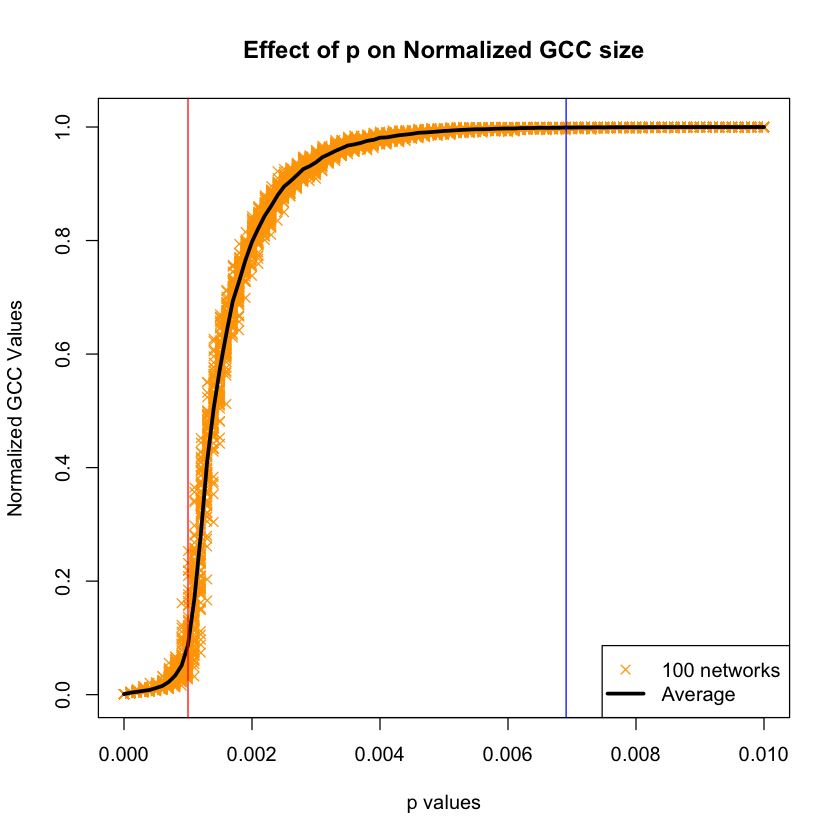

In [9]:
p_sweep = seq(0, 0.01, 0.0001)
avgVals = rep(0, length(p_sweep))
j = 1
plot(1, type = "n", xlab = "p values",
     ylab = "Normalized GCC Values", xlim = c(0, 0.01),
     main = "Effect of p on Normalized GCC size",
     ylim = c(0, 1.01))
for (p in p_sweep) {
    total = 0
    for (i in c(1:100)) {
        g = sample_gnp(num_nodes, p, directed = FALSE)
        comps = clusters(g)
        sz = max(comps$csize)
        normalizedGCC = sz / num_nodes
        total = total + normalizedGCC
        points(p, normalizedGCC, col= 'orange', pch=4)
    }
    avgVals[j] = total / 100
    j = j + 1
}
lines(p_sweep, avgVals, lwd=3.0)
abline(v=gcc_threshold, col="red")
abline(v=connectivity_threshold, col="blue")
legend(x = "bottomright",
       legend = c("100 networks", "Average"),  
       pch = c(4, NA),           
       lty = c(NA, 1),           
       lwd = c(NA, 3.0),
       col = c("orange", 1)
      )

i. Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? Do they match with theoretical values mentioned or derived in lectures?

Empirically, there is an inflection point at around 0.0008. This looks to be where the GCC emerges. This is very close to the theoretical value found in the lectures and as shown by the red line for the connectivity threshold.

ii. Empirically estimate the value of p where the giant connected component takes up over 99% of the nodes in almost every experiment.

The value of p where this occurs looks to be around 0.0055.

QUESTION 1(d) i. Define the average degree of nodes c = n × p = 0.5. Sweep over the number of nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed

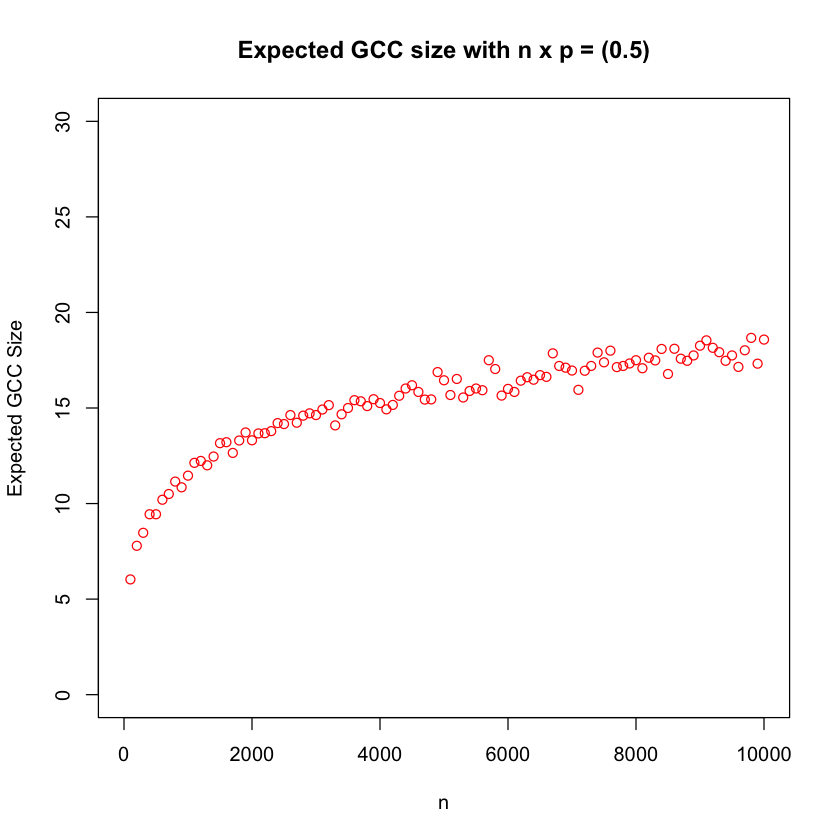

In [20]:
## In order to understand the relationship between the average GCC size and the number of nodes when the average node 
## degree is kept fixed, we perform the following experiment: (i) For a given average node degree,
## we sweep the network size from 100 to 10000 and for each network size we compute the average GCC size by averaging
## over 100 instances of the random network (ii) We repeat (i) for different average node degree (iii) We plot
## average GCC size as a function of network size

n_sweep = seq(100, 10000, 100)

c_sweep = c(0.5)
colors = c("red")

plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 30),
     main = "Expected GCC size with n x p = (0.5)")

for (i in n_sweep) {
    for (k in (1 : length(c_sweep))) {
        p = c_sweep[k] / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
    }
}



The trend looks logarithmic as n increases.



ii. Repeat the same for c = 1.

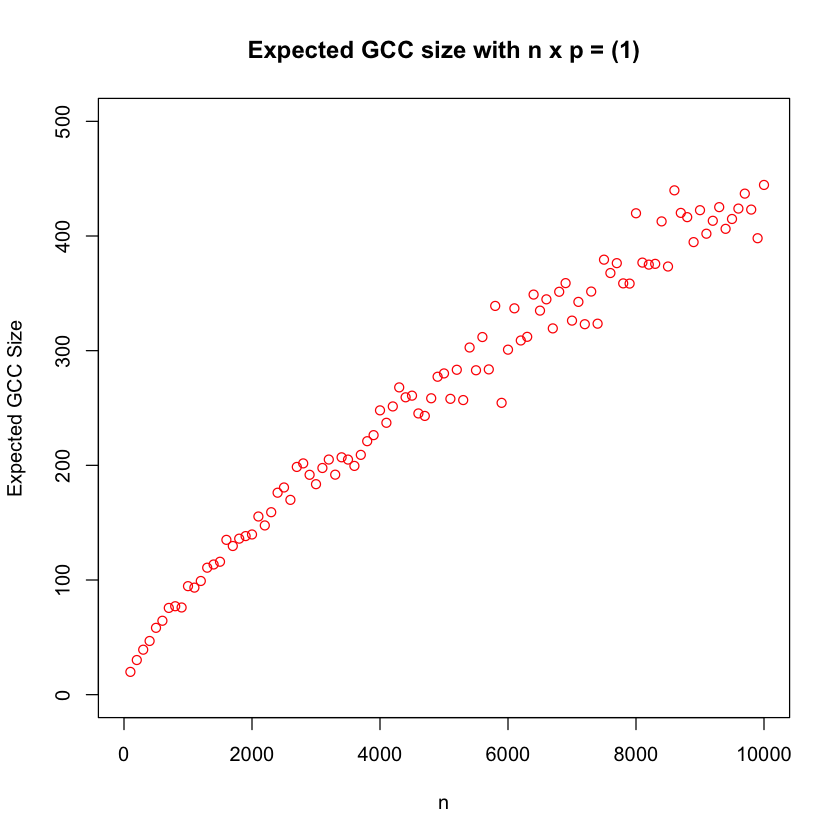

In [23]:
n_sweep = seq(100, 10000, 100)

c_sweep = c(1)
colors = c("red")

plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 500),
     main = "Expected GCC size with n x p = (1)")

for (i in n_sweep) {
    for (k in (1 : length(c_sweep))) {
        p = c_sweep[k] / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
    }
}

The trend looks a bit logarithmic but also looks more linear than part (i). The values become more spread out as n increases if there were a distance from an average line.

iii. Repeat the same for values of c = 1.1, 1.2, 1.3, and show the results for these three values in a single plot.


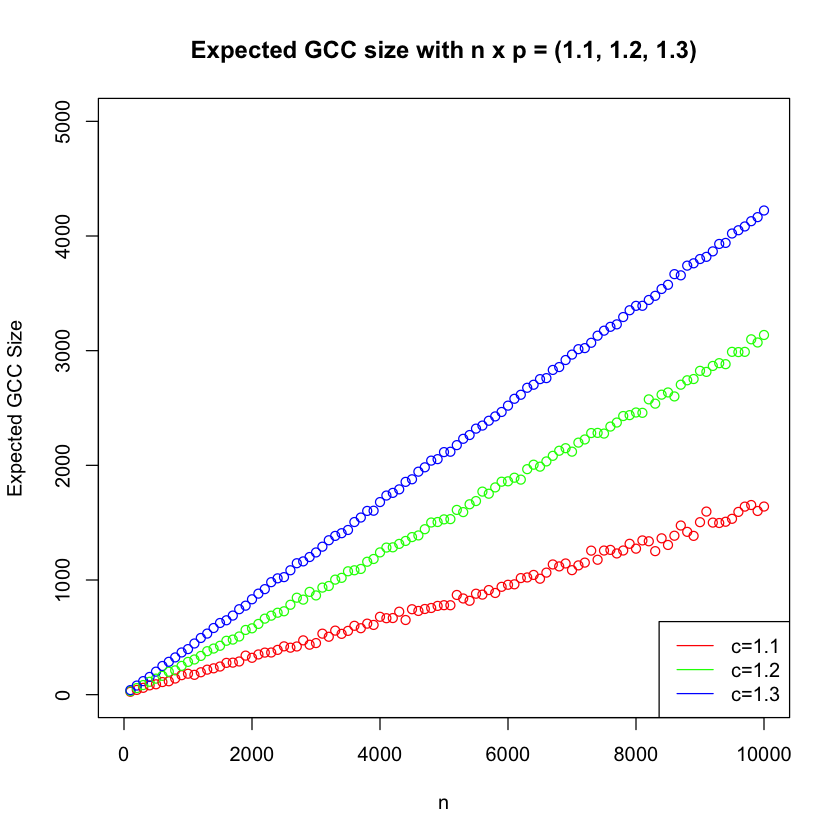

In [24]:
n_sweep = seq(100, 10000, 100)

c_sweep = c(1.1, 1.2, 1.3)
colors = c("red", "green", "blue")

plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 5000),
     main = "Expected GCC size with n x p = (1.1, 1.2, 1.3)")

for (i in n_sweep) {
    for (k in (1 : length(c_sweep))) {
        p = c_sweep[k] / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
    }
}

legend(x = "bottomright",
       legend = c("c=1.1", "c=1.2", "c=1.3"),             
       lty = c(1, 1, 1),           
       col = c("red", "green", "blue")
      )

iv. What is the relation between the expected GCC size and n in each case?

For the three cases above, the trend looks to be linear-increasing between n and expected GCC size. As c increases, the slopes of the lines increase as well.

QUESTION 2: Create networks using preferential attachment model

(a) Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [25]:
for (i in seq(0, 100000, 1)){
    g = sample_pa(1000, m=1, directed=FALSE)
    if(!is_connected(g)){
        print("Not connected")
    }
}


As can be seen from running the cell above, testing 100,000 different networks, none were disconnected. This isn't an exhaustive proof that it will always be connected but it does point in that direction. Also in lecture, it is mentioned that this type of graph is connected by its construction.

(b) Use fast greedy method to find the community structure. Measure modularity.



In [26]:
g = sample_pa(1000,m=1,directed=FALSE)
cluster_fast_greedy(g)

IGRAPH clustering fast greedy, groups: 31, mod: 0.93
+ groups:
  $`1`
   [1]    6   11   29   31   36   66   67   80   84  103  111  133  163  171
  [15]  193  243  293  323  331  336  370  440  449  473  477  517  524  526
  [29]  556  570  579  625  632  662  686  705  801  806  851  885  894  914
  [43]  990 1000
  
  $`2`
   [1]  21  88  91 106 162 186 220 238 245 256 259 264 283 310 333 342 365 384
  [19] 403 406 412 442 583 584 617 623 657 660 672 681 684 718 726 749 766 773
  [37] 774 790 798 800 821 907 944 976
  + ... omitted several groups/vertices

In [27]:
modularity(cluster_fast_greedy(g))


[1] 0.9317942

(c) Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?



In [28]:
g2 = sample_pa(10000, m=1, directed=FALSE)
cluster_fast_greedy(g2)

IGRAPH clustering fast greedy, groups: 107, mod: 0.98
+ groups:
  $`1`
    [1]   63  103  151  242  386  390  415  561  653  667  771  797  848 1009
   [15] 1015 1030 1031 1231 1328 1448 1457 1649 1654 1962 1966 2018 2108 2280
   [29] 2281 2386 2397 2429 2462 2490 2585 2588 2712 2751 2768 2791 2819 2874
   [43] 3139 3167 3202 3250 3315 3338 3344 3496 3516 3621 3671 3681 3727 3749
   [57] 3949 3966 3984 4004 4128 4195 4213 4215 4439 4485 4647 4706 4740 4807
   [71] 4813 4872 4993 5137 5152 5192 5204 5342 5376 5516 5533 5583 5599 5640
   [85] 5659 5671 5693 5785 5796 5876 5896 5903 5936 5944 5965 5988 6011 6053
   [99] 6162 6284 6327 6365 6394 6454 6687 6752 6796 6822 6880 6889 7002 7222
  [113] 7225 7295 7405 7451 7498 7567 7584 7591 7637 7717 7874 7882 7917 7943
  + ... omitted several groups/vertices

In [29]:
g2 = sample_pa(10000, m=1, directed=FALSE)
modularity(cluster_fast_greedy(g2))

[1] 0.9788539

Modularity is slightly higher here than for the graph in (b).



(d) Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression.

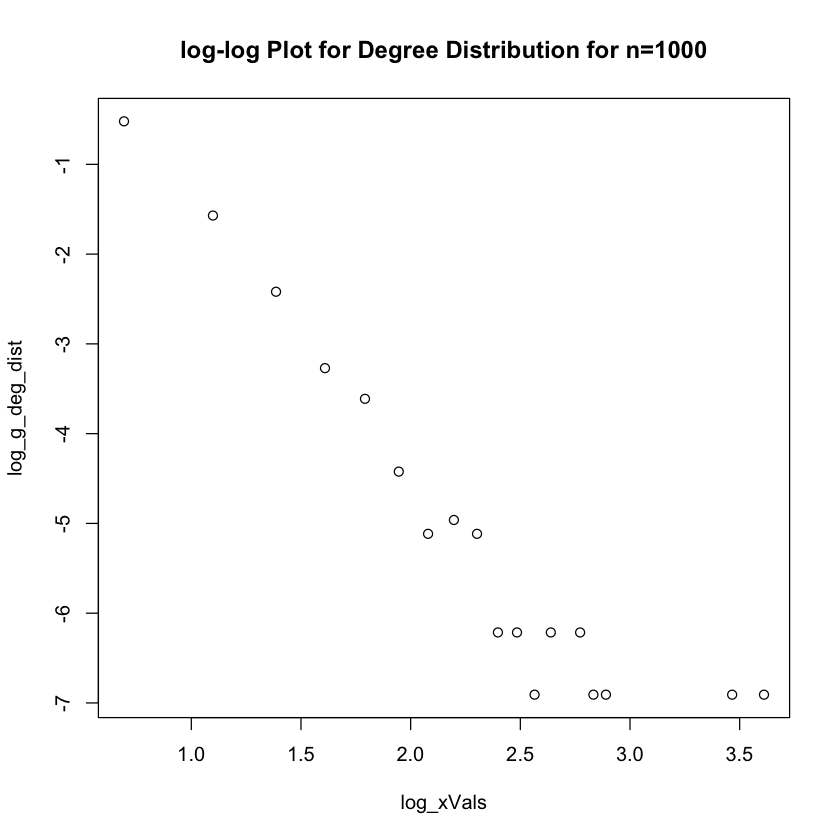

In [30]:
g_deg_dist = degree.distribution(g)
xVals = 1:length(g_deg_dist)
log_g_deg_dist = list()
log_xVals = list()
for(i in 1:length(g_deg_dist)){
    if(g_deg_dist[i] != 0){
        log_g_deg_dist = append(log_g_deg_dist, log(g_deg_dist[i]))
        log_xVals = append(log_xVals, log(i))
    }
}

plot(log_xVals, log_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000")

In [31]:
lm(unlist(log_g_deg_dist) ~ unlist(log_xVals))



Call:
lm(formula = unlist(log_g_deg_dist) ~ unlist(log_xVals))

Coefficients:
      (Intercept)  unlist(log_xVals)  
           0.5652            -2.4674  


From the above, the slope is approximately -2.713 for n=1000.



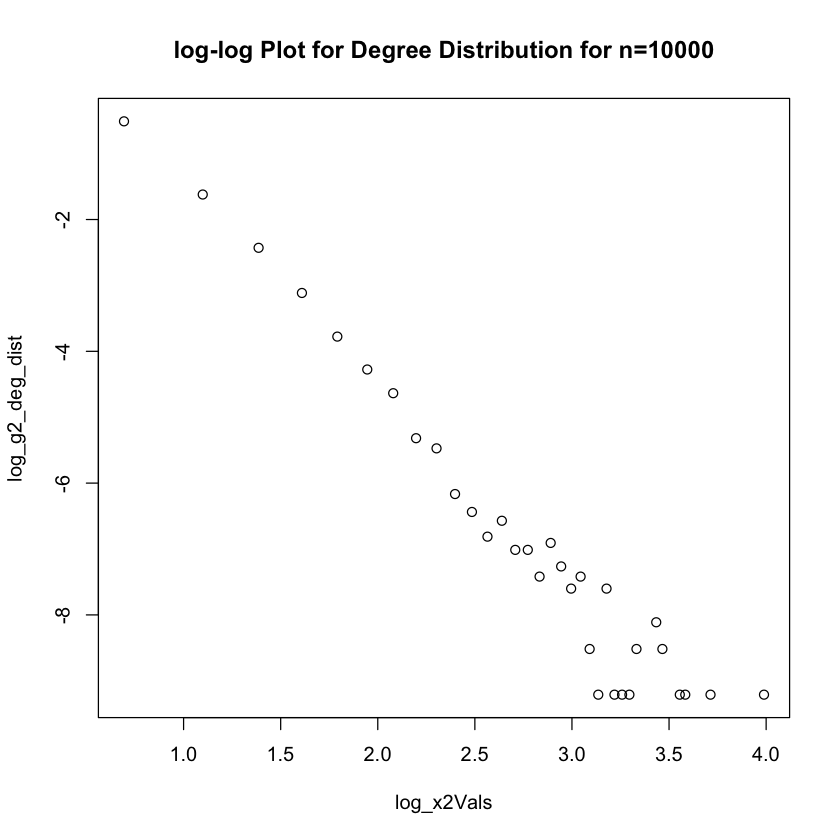

In [32]:
g2_deg_dist = degree.distribution(g2)
x2Vals = 1:length(g2_deg_dist)
log_g2_deg_dist = list()
log_x2Vals = list()
for(i in 1:length(g2_deg_dist)){
    if(g2_deg_dist[i] != 0){
        log_g2_deg_dist = append(log_g2_deg_dist, log(g2_deg_dist[i]))
        log_x2Vals = append(log_x2Vals, log(i))
    }
}

plot(log_x2Vals, log_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000")

In [33]:
lm(unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))



Call:
lm(formula = unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))

Coefficients:
       (Intercept)  unlist(log_x2Vals)  
             1.394              -2.998  


From the above, the slope is approximately -3.031 for n=10000.



(e) In the two networks generated in 2(a) and 2(c), perform the following: Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [35]:
g = sample_pa(1000, m=1, directed=FALSE)
rand_pick_g_deg_dist = rep(0, length(g_deg_dist))
num_picks = 10000
node = sample(gorder(g),1)
rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g,node),1)
    rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
}
rand_pick_g_deg_dist = rand_pick_g_deg_dist/num_picks

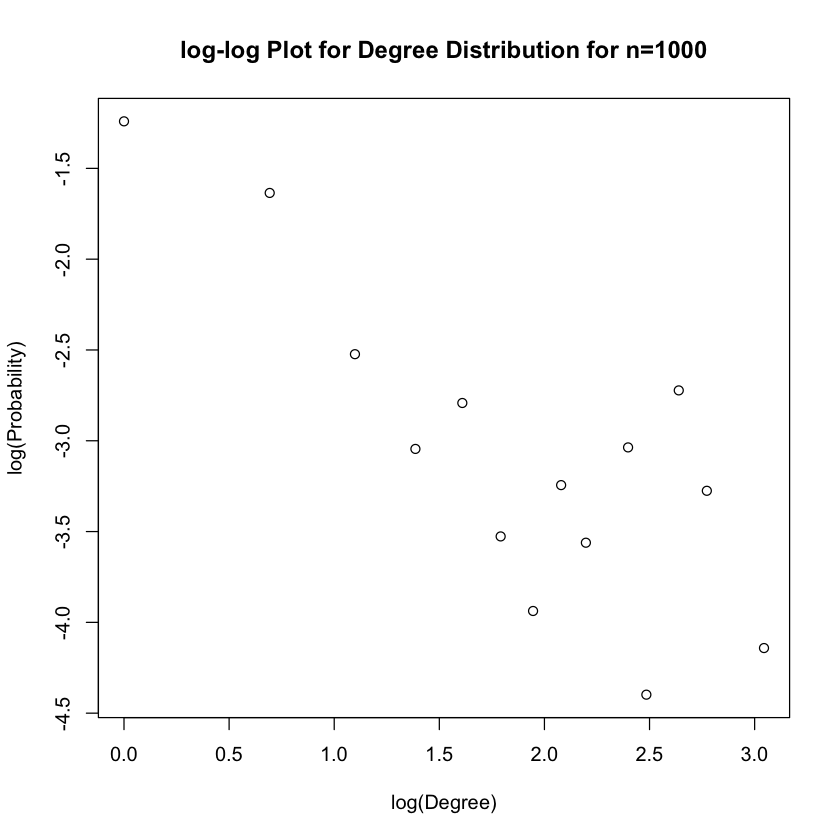

In [42]:
rand_pick_g_xVals = list()
log_rand_pick_g_deg_dist = list()
for(i in 1:length(rand_pick_g_deg_dist)){
    if(is.na(rand_pick_g_deg_dist[i])){
        next
    }
    else if(rand_pick_g_deg_dist[i] != 0){
        log_rand_pick_g_deg_dist = append(log_rand_pick_g_deg_dist, log(rand_pick_g_deg_dist[i]))
        rand_pick_g_xVals = append(rand_pick_g_xVals, log(i))
    }

    
}
plot(rand_pick_g_xVals, log_rand_pick_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000", xlab="log(Degree)", ylab="log(Probability)")

In [43]:
lm(unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))


Call:
lm(formula = unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))

Coefficients:
              (Intercept)  unlist(rand_pick_g_xVals)  
                  -1.5214                    -0.8332  


From the above plot and linear regression, there is a rough linear downard trend. The slope is less steep at around -1 compared to the node degree distribution. It's around a third of the magnitude.

In [44]:
rand_pick_g2_deg_dist = rep(0, length(g2_deg_dist))
num_picks = 100000
node = sample(gorder(g2),1)
rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g2,node))
    rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
}
rand_pick_g2_deg_dist = rand_pick_g2_deg_dist/num_picks

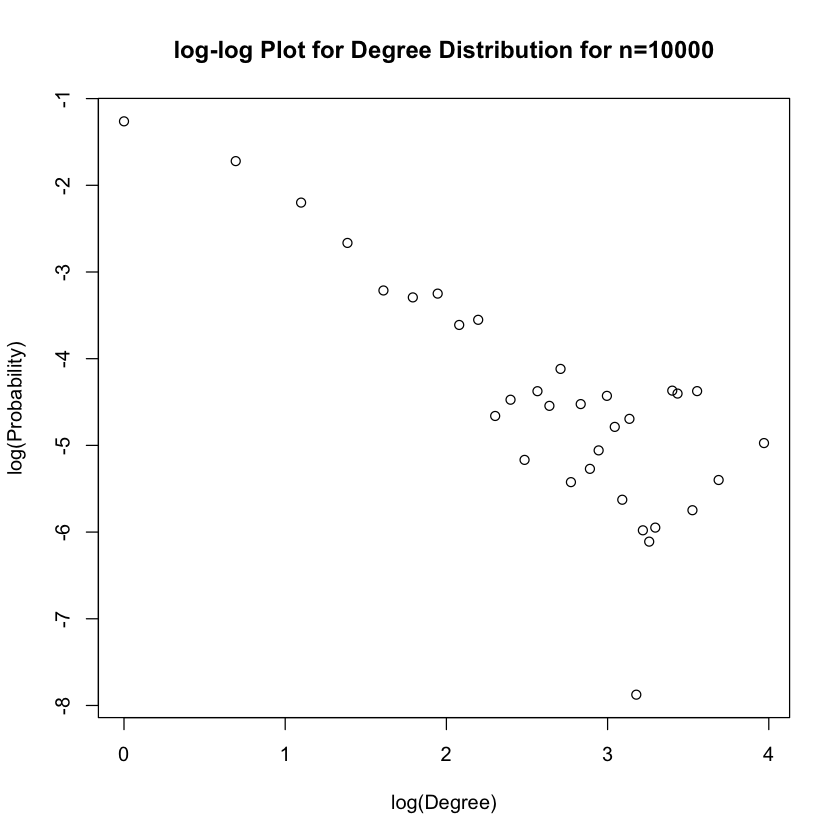

In [45]:
rand_pick_g2_xVals = list()
log_rand_pick_g2_deg_dist = list()
for(i in 1:length(rand_pick_g2_deg_dist)){
    if(rand_pick_g2_deg_dist[i] != 0){
        log_rand_pick_g2_deg_dist = append(log_rand_pick_g2_deg_dist, log(rand_pick_g2_deg_dist[i]))
        rand_pick_g2_xVals = append(rand_pick_g2_xVals, log(i))
    }
}
plot(rand_pick_g2_xVals, log_rand_pick_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000", xlab="log(Degree)", ylab="log(Probability)")

In [46]:
lm(unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))


Call:
lm(formula = unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))

Coefficients:
               (Intercept)  unlist(rand_pick_g2_xVals)  
                    -1.222                      -1.240  


Similar to the graph where n=1000, for n=10000, there is roughly a downward trend and compared to the node degree distribution, the slope is less steep. Here the slope is around -1.25.

(f) Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000.
Show the relationship between the age of nodes and their expected degree through
an appropriate plot.

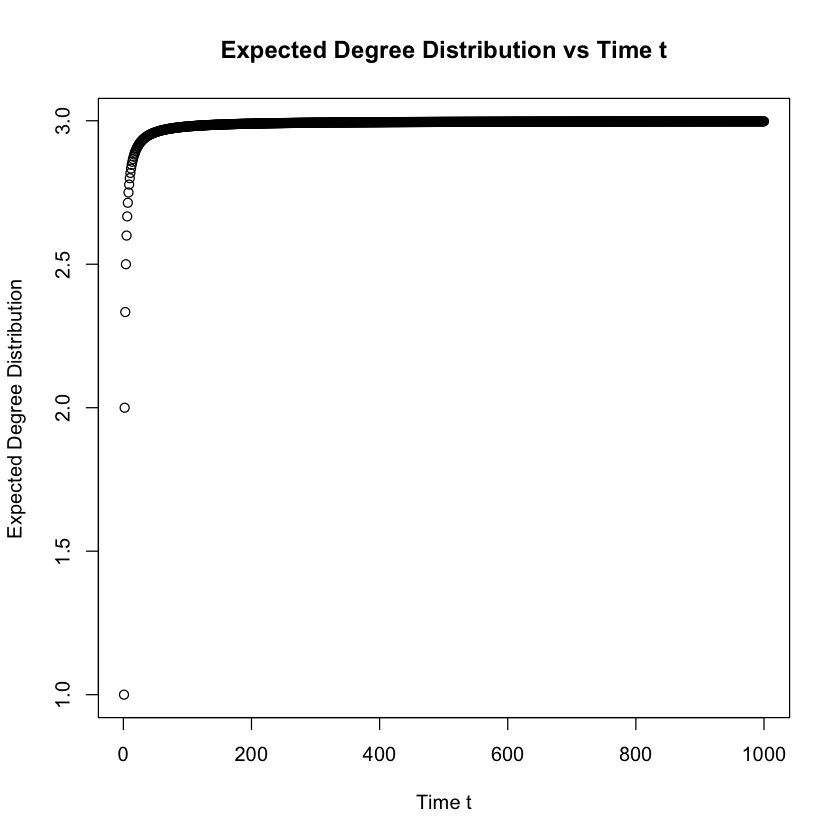

In [47]:
exp_deg_list = list()
for(i in 1:1000){
    temp_g = sample_pa(i, m=1, directed=FALSE)
    deg_dist = degree.distribution(temp_g)
    exp_deg = 0
    for(j in 1:length(deg_dist)){
        exp_deg = exp_deg + (j * deg_dist[j])
    }
    exp_deg_list = append(exp_deg_list, exp_deg)
}
time = c(1:1000)
plot(time, exp_deg_list, main="Expected Degree Distribution vs Time t", xlab="Time t", ylab="Expected Degree Distribution")

However in office hours Tonmoy did a differnent approach which we implemented below

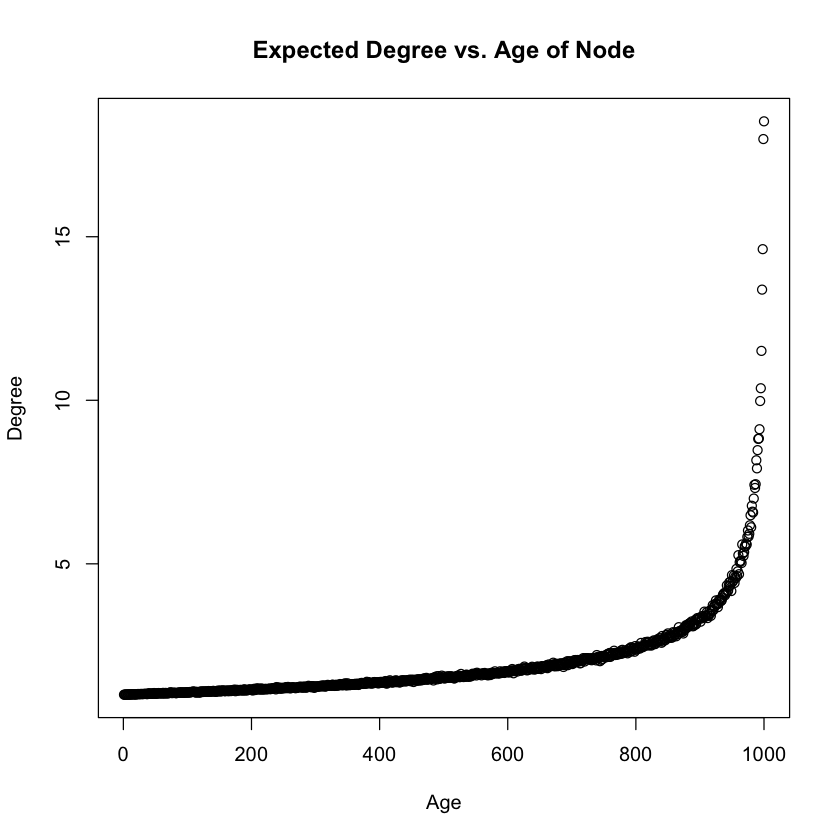

In [48]:
deg = rep(0,1000)
ages = c(1:1000)
for(i in ages){
    g = sample_pa(1000,m=1,directed=FALSE)
    deg = deg + degree(g)
}

deg = deg/1000
plot(rev(ages),deg,main="Expected Degree vs. Age of Node", xlab="Age", ylab="Degree")

(g) Repeat the previous parts (a-f) for m = 2, and m = 5. Compare the results of each
part for different values of m.

m=2:

Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 2 old nodes. Is such a network always connected?

In [49]:
for (i in seq(0, 10000, 1)){
    g = sample_pa(1000, m=2, directed=FALSE)
    if(!is_connected(g)){
        print("Not connected")
    }
}

The number of graphs tested was reduced to 10000 compared to m=1 to reduce runtime. Still, all graphs are connected.
Use fast greedy method to find the community structure. Measure modularity.

In [50]:
cluster_fast_greedy(g)

IGRAPH clustering fast greedy, groups: 20, mod: 0.52
+ groups:
  $`1`
   [1]  36  65 239 311 362 402 424 425 474 504 518 587 616 632 638 685 711 749
  [19] 751 765 784 804 810 827 828 868 874 915 928 935 947 948 998
  
  $`2`
   [1]   91  115  173  178  180  201  233  263  264  273  285  351  356  358
  [15]  363  364  420  429  435  439  452  455  476  515  546  568  569  585
  [29]  605  620  623  636  644  709  724  727  737  740  755  781  787  834
  [43]  897  898  908  919  946  951  953  961 1000
  
  + ... omitted several groups/vertices

In [51]:
modularity(cluster_fast_greedy(g))

[1] 0.5228474

Try to generate a larger network with 10000 nodes using the same model. Compute
modularity. How is it compared to the smaller network’s modularity?

In [52]:
g2 = sample_pa(10000, m=2, directed=FALSE)
cluster_fast_greedy(g2)

IGRAPH clustering fast greedy, groups: 36, mod: 0.53
+ groups:
  $`1`
    [1]  246  252  256  290  358  379  420  448  480  537  573  585  683  735
   [15]  743  752  793  892  907  914  942 1006 1019 1070 1098 1127 1244 1285
   [29] 1291 1309 1322 1471 1511 1530 1565 1582 1584 1623 1655 1679 1821 1847
   [43] 1886 2101 2145 2155 2174 2217 2235 2242 2249 2275 2276 2319 2490 2495
   [57] 2584 2652 2653 2666 2742 2896 2946 3020 3058 3059 3074 3110 3142 3235
   [71] 3247 3260 3279 3379 3420 3427 3461 3501 3508 3631 3655 3691 3703 3757
   [85] 3789 3790 3814 3848 3859 3881 4101 4136 4157 4183 4194 4250 4286 4296
   [99] 4347 4361 4366 4398 4409 4412 4440 4454 4568 4580 4623 4633 4670 4687
  [113] 4707 4711 4727 4729 4802 4834 4870 4910 4916 4939 4948 4972 5016 5027
  + ... omitted several groups/vertices

In [53]:
g2 = sample_pa(10000, m=2, directed=FALSE)
modularity(cluster_fast_greedy(g2))

[1] 0.529937

Here, the modularity is slightly greater for n=10000 compared to n=1000.

Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate
the slope of the plot using linear regression.

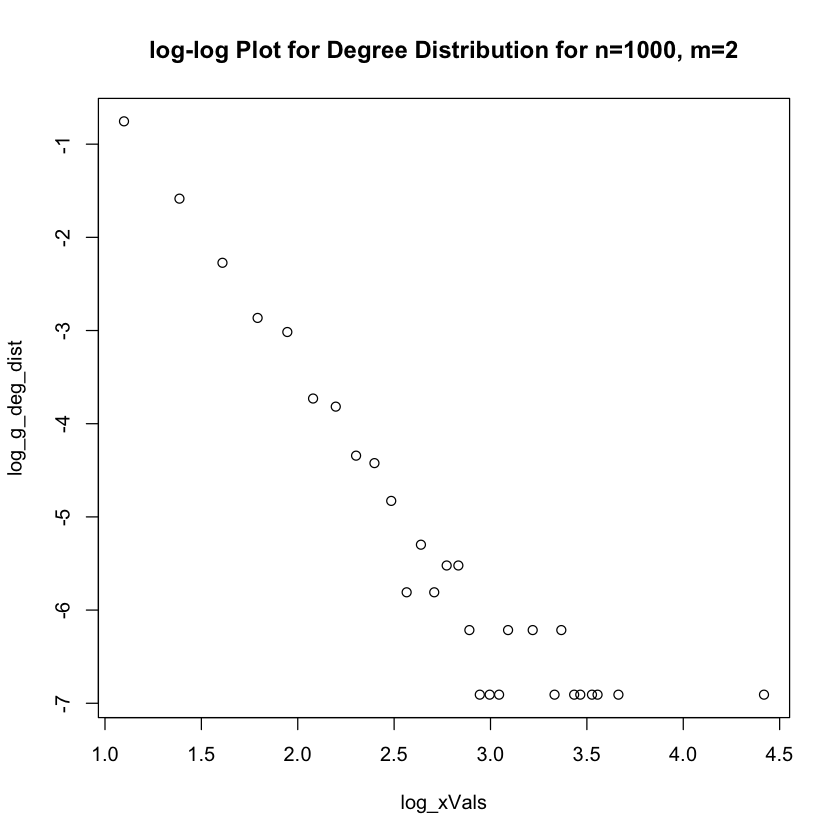

In [54]:
g_deg_dist = degree.distribution(g)
xVals = 1:length(g_deg_dist)
log_g_deg_dist = list()
log_xVals = list()
for(i in 1:length(g_deg_dist)){
    if(g_deg_dist[i] != 0){
        log_g_deg_dist = append(log_g_deg_dist, log(g_deg_dist[i]))
        log_xVals = append(log_xVals, log(i))
    }
}

plot(log_xVals, log_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000, m=2")

In [55]:
lm(unlist(log_g_deg_dist) ~ unlist(log_xVals))


Call:
lm(formula = unlist(log_g_deg_dist) ~ unlist(log_xVals))

Coefficients:
      (Intercept)  unlist(log_xVals)  
           0.8684            -2.2406  


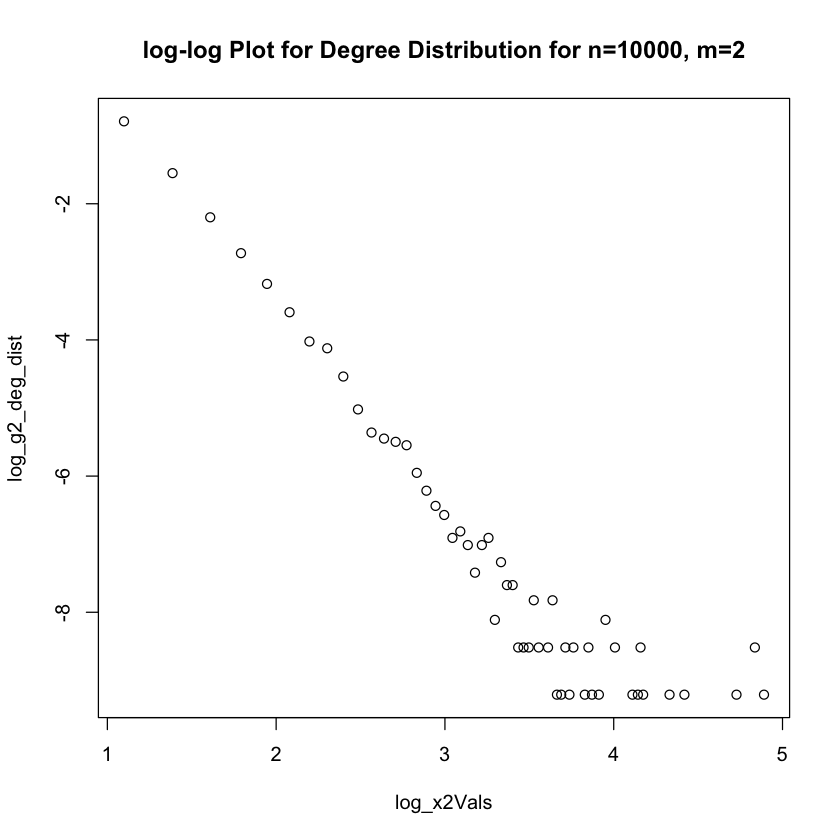

In [56]:
g2_deg_dist = degree.distribution(g2)
x2Vals = 1:length(g2_deg_dist)
log_g2_deg_dist = list()
log_x2Vals = list()
for(i in 1:length(g2_deg_dist)){
    if(g2_deg_dist[i] != 0){
        log_g2_deg_dist = append(log_g2_deg_dist, log(g2_deg_dist[i]))
        log_x2Vals = append(log_x2Vals, log(i))
    }
}

plot(log_x2Vals, log_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000, m=2")

In [57]:
lm(unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))


Call:
lm(formula = unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))

Coefficients:
       (Intercept)  unlist(log_x2Vals)  
             1.118              -2.494  


From the above, for n=1000, the slope is around -2.2. For n=10000, the slope is around -2.55.
In the two networks generated in above, perform the following: Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [58]:
g_deg_dist = degree.distribution(g)
rand_pick_g_deg_dist = rep(0, length(g_deg_dist))
num_picks = 10000
node = sample(gorder(g),1)
rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g,node),1)
    rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
}
rand_pick_g_deg_dist = rand_pick_g_deg_dist/num_picks

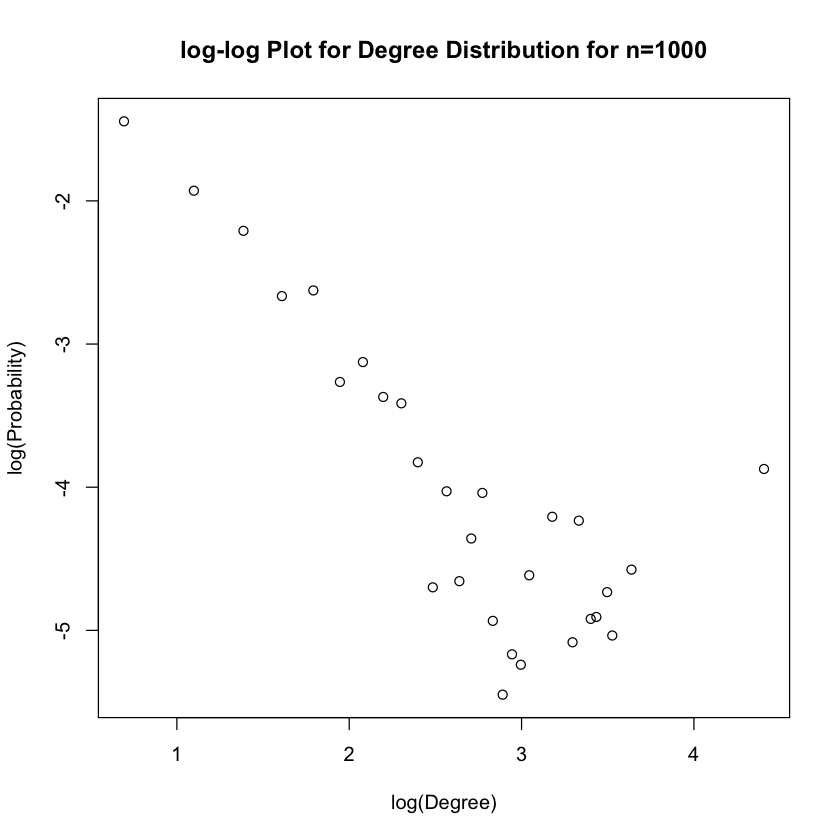

In [59]:
rand_pick_g_xVals = list()
log_rand_pick_g_deg_dist = list()
for(i in 1:length(rand_pick_g_deg_dist)){
    if(rand_pick_g_deg_dist[i] != 0){
        log_rand_pick_g_deg_dist = append(log_rand_pick_g_deg_dist, log(rand_pick_g_deg_dist[i]))
        rand_pick_g_xVals = append(rand_pick_g_xVals, log(i))
    }
}
plot(rand_pick_g_xVals, log_rand_pick_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000", xlab="log(Degree)", ylab="log(Probability)")

In [60]:
lm(unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))


Call:
lm(formula = unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))

Coefficients:
              (Intercept)  unlist(rand_pick_g_xVals)  
                   -1.223                     -1.053  


In [61]:
g2_deg_dist = degree.distribution(g2)
rand_pick_g2_deg_dist = rep(0, length(g2_deg_dist))
num_picks = 100000
node = sample(gorder(g2),1)
rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g2,node))
    rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
}
rand_pick_g2_deg_dist = rand_pick_g2_deg_dist/num_picks

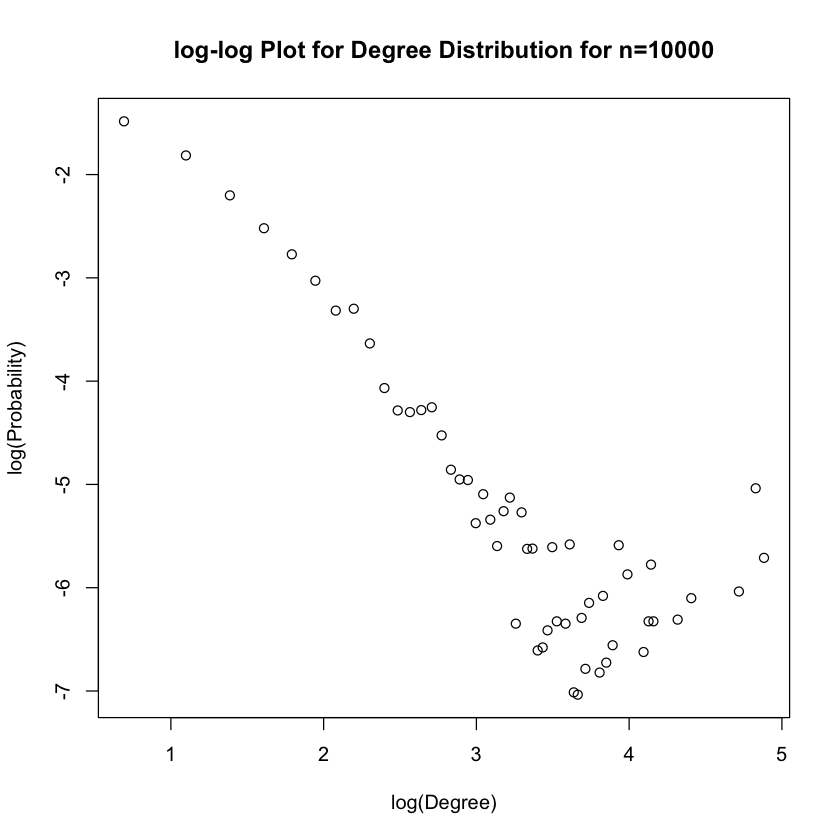

In [62]:
rand_pick_g2_xVals = list()
log_rand_pick_g2_deg_dist = list()
for(i in 1:length(rand_pick_g2_deg_dist)){
    if(rand_pick_g2_deg_dist[i] != 0){
        log_rand_pick_g2_deg_dist = append(log_rand_pick_g2_deg_dist, log(rand_pick_g2_deg_dist[i]))
        rand_pick_g2_xVals = append(rand_pick_g2_xVals, log(i))
    }
}
plot(rand_pick_g2_xVals, log_rand_pick_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000", xlab="log(Degree)", ylab="log(Probability)")

In [63]:
lm(unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))


Call:
lm(formula = unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))

Coefficients:
               (Intercept)  unlist(rand_pick_g2_xVals)  
                   -0.9346                     -1.3343  


Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

Initial approach:

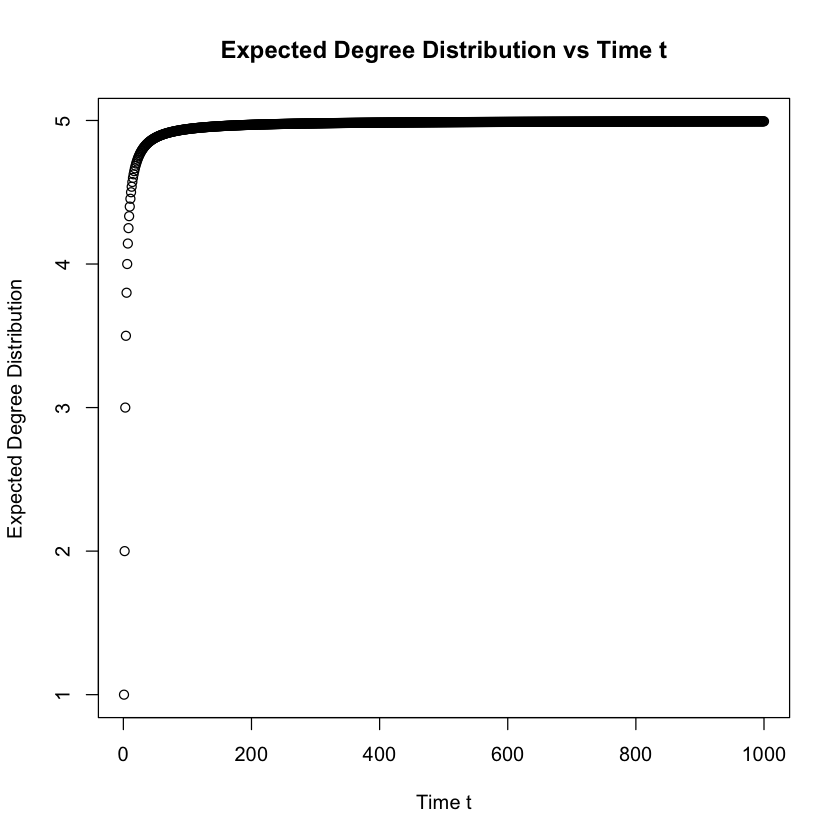

In [64]:
exp_deg_list = list()
for(i in 1:1000){
    temp_g = sample_pa(i, m=2, directed=FALSE)
    deg_dist = degree.distribution(temp_g)
    exp_deg = 0
    for(j in 1:length(deg_dist)){
        exp_deg = exp_deg + (j * deg_dist[j])
    }
    exp_deg_list = append(exp_deg_list, exp_deg)
}
time = c(1:1000)
plot(time, exp_deg_list, main="Expected Degree Distribution vs Time t", xlab="Time t", ylab="Expected Degree Distribution")

Approach from office hours:

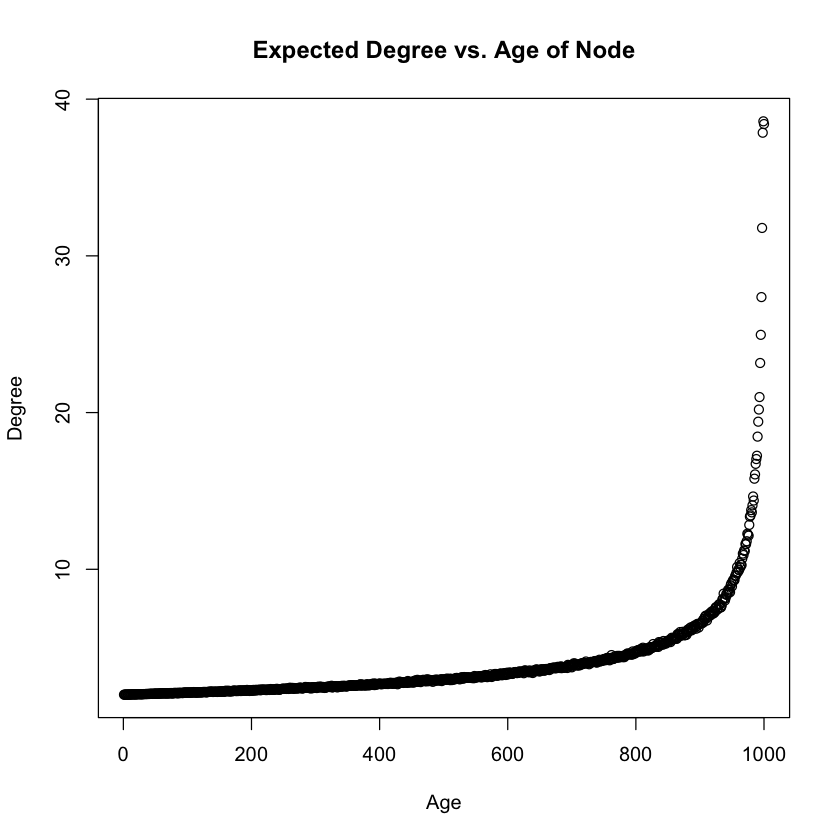

In [65]:
deg = rep(0,1000)
ages = c(1:1000)
for(i in ages){
    g = sample_pa(1000,m=2,directed=FALSE)
    deg = deg + degree(g)
}

deg = deg/1000
plot(rev(ages),deg,main="Expected Degree vs. Age of Node", xlab="Age", ylab="Degree")

m=5:

Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 5 old nodes. Is such a network always connected?

In [66]:
for (i in seq(0, 10000, 1)){
    g = sample_pa(1000, m=5, directed=FALSE)
    if(!is_connected(g)){
        print("Not connected")
    }
}

Similar to the previous values of m, the graph is always connected here.

Use fast greedy method to find the community structure. Measure modularity.

In [67]:
g = sample_pa(1000, m=5, directed=FALSE)
cluster_fast_greedy(g)

IGRAPH clustering fast greedy, groups: 10, mod: 0.28
+ groups:
  $`1`
    [1]    2   14   16   31   77   78   79  121  127  137  141  161  168  175
   [15]  187  191  202  219  234  239  269  271  282  290  291  294  296  297
   [29]  299  311  323  329  335  345  355  396  404  409  413  415  430  476
   [43]  479  481  483  490  491  500  511  516  519  528  535  542  555  556
   [57]  558  563  565  572  573  576  578  588  607  619  624  642  643  652
   [71]  662  671  686  688  696  717  718  724  725  729  734  753  754  765
   [85]  767  770  773  783  784  792  807  810  830  836  837  855  865  878
   [99]  891  894  901  913  926  932  942  946  948  958  963  966  975  981
  [113]  987 1000
  + ... omitted several groups/vertices

In [68]:
modularity(cluster_fast_greedy(g))

[1] 0.2835815

Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

In [69]:
g2 = sample_pa(10000, m=5, directed=FALSE)
cluster_fast_greedy(g2)

IGRAPH clustering fast greedy, groups: 13, mod: 0.27
+ groups:
  $`1`
     [1]   81   94   95   97  113  114  121  123  124  140  151  158  201  204
    [15]  211  213  215  236  238  244  246  250  267  270  296  299  300  307
    [29]  317  320  348  349  353  360  367  381  387  389  402  424  430  431
    [43]  449  461  467  479  484  486  492  493  502  514  522  525  543  551
    [57]  558  560  564  565  567  569  572  585  595  609  620  631  636  642
    [71]  644  645  673  688  707  708  709  720  729  736  744  747  749  755
    [85]  760  763  785  800  816  830  834  835  845  850  855  868  871  883
    [99]  886  928  932  933  934  940  944  956  958  977 1007 1012 1024 1025
   [113] 1030 1042 1044 1059 1064 1076 1106 1107 1114 1124 1129 1132 1142 1162
  + ... omitted several groups/vertices

In [70]:
g2 = sample_pa(10000, m=5, directed=FALSE)
modularity(cluster_fast_greedy(g2))

[1] 0.2777226

Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression.

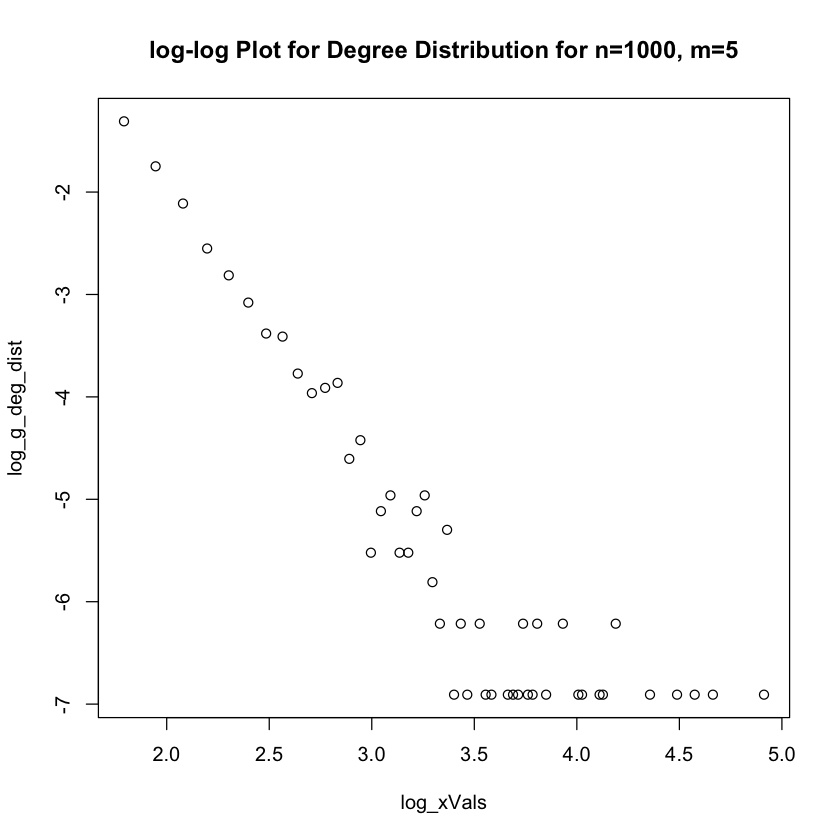

In [71]:
g = sample_pa(1000, m=5, directed=FALSE)
g_deg_dist = degree.distribution(g)
xVals = 1:length(g_deg_dist)
log_g_deg_dist = list()
log_xVals = list()
for(i in 1:length(g_deg_dist)){
    if(g_deg_dist[i] != 0){
        log_g_deg_dist = append(log_g_deg_dist, log(g_deg_dist[i]))
        log_xVals = append(log_xVals, log(i))
    }
}

plot(log_xVals, log_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000, m=5")

In [72]:
lm(unlist(log_g_deg_dist) ~ unlist(log_xVals))


Call:
lm(formula = unlist(log_g_deg_dist) ~ unlist(log_xVals))

Coefficients:
      (Intercept)  unlist(log_xVals)  
            1.398             -2.039  


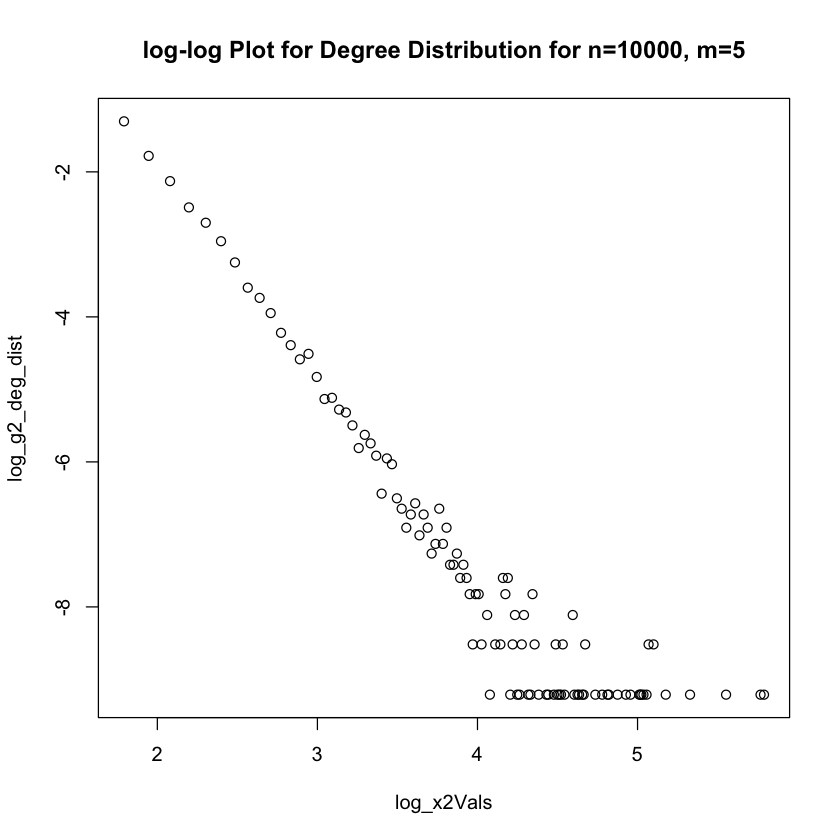

In [73]:
g2 = sample_pa(10000, m=5, directed=FALSE)
g2_deg_dist = degree.distribution(g2)
x2Vals = 1:length(g2_deg_dist)
log_g2_deg_dist = list()
log_x2Vals = list()
for(i in 1:length(g2_deg_dist)){
    if(g2_deg_dist[i] != 0){
        log_g2_deg_dist = append(log_g2_deg_dist, log(g2_deg_dist[i]))
        log_x2Vals = append(log_x2Vals, log(i))
    }
}

plot(log_x2Vals, log_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000, m=5")

In [74]:
lm(unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))


Call:
lm(formula = unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))

Coefficients:
       (Intercept)  unlist(log_x2Vals)  
             1.726              -2.284  


In the two networks generated in above, perform the following: Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [75]:
g_deg_dist = degree.distribution(g)
rand_pick_g_deg_dist = rep(0, length(g_deg_dist))
num_picks = 10000
node = sample(gorder(g),1)
rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g,node),1)
    rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
}
rand_pick_g_deg_dist = rand_pick_g_deg_dist/num_picks

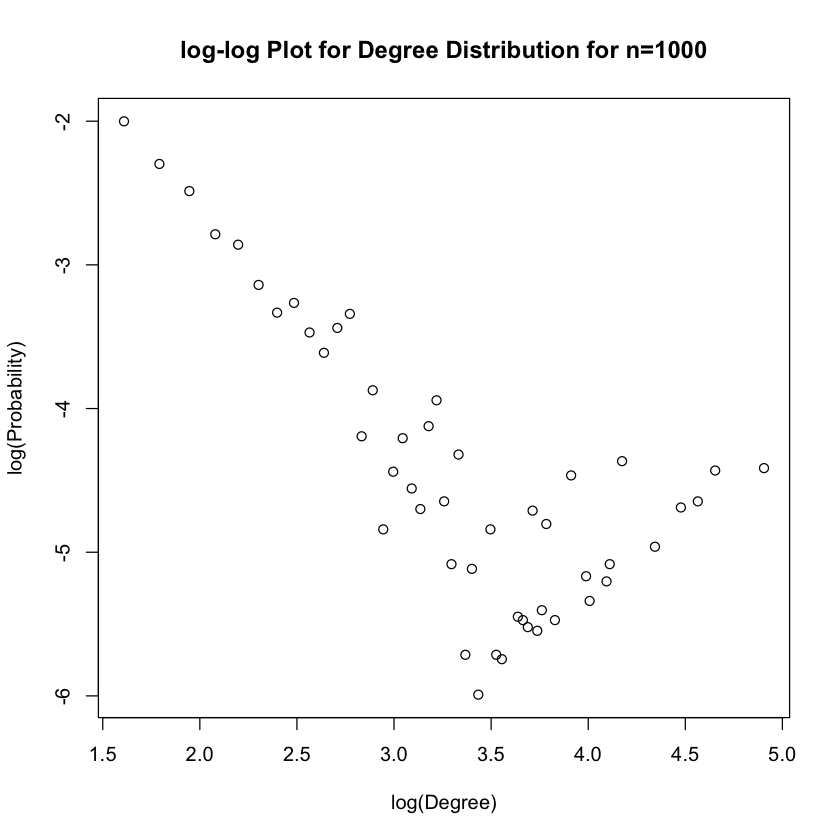

In [76]:
rand_pick_g_xVals = list()
log_rand_pick_g_deg_dist = list()
for(i in 1:length(rand_pick_g_deg_dist)){
    if(rand_pick_g_deg_dist[i] != 0){
        log_rand_pick_g_deg_dist = append(log_rand_pick_g_deg_dist, log(rand_pick_g_deg_dist[i]))
        rand_pick_g_xVals = append(rand_pick_g_xVals, log(i))
    }
}
plot(rand_pick_g_xVals, log_rand_pick_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000", xlab="log(Degree)", ylab="log(Probability)")

In [77]:
lm(unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))


Call:
lm(formula = unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))

Coefficients:
              (Intercept)  unlist(rand_pick_g_xVals)  
                  -1.2491                    -0.9598  


In [78]:
g2_deg_dist = degree.distribution(g2)
rand_pick_g2_deg_dist = rep(0, length(g2_deg_dist))
num_picks = 100000
node = sample(gorder(g2),1)
rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g2,node))
    rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
}
rand_pick_g2_deg_dist = rand_pick_g2_deg_dist/num_picks

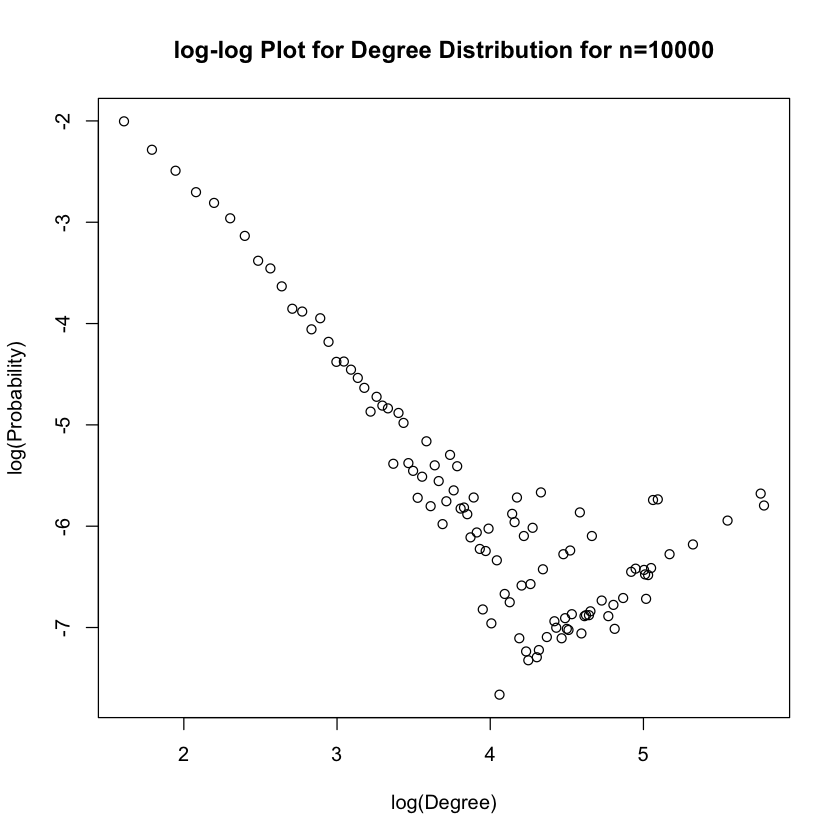

In [79]:
rand_pick_g2_xVals = list()
log_rand_pick_g2_deg_dist = list()
for(i in 1:length(rand_pick_g2_deg_dist)){
    if(rand_pick_g2_deg_dist[i] != 0){
        log_rand_pick_g2_deg_dist = append(log_rand_pick_g2_deg_dist, log(rand_pick_g2_deg_dist[i]))
        rand_pick_g2_xVals = append(rand_pick_g2_xVals, log(i))
    }
}
plot(rand_pick_g2_xVals, log_rand_pick_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000", xlab="log(Degree)", ylab="log(Probability)")

In [80]:
lm(unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))


Call:
lm(formula = unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))

Coefficients:
               (Intercept)  unlist(rand_pick_g2_xVals)  
                   -0.9088                     -1.2161  


Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

Initial approach:

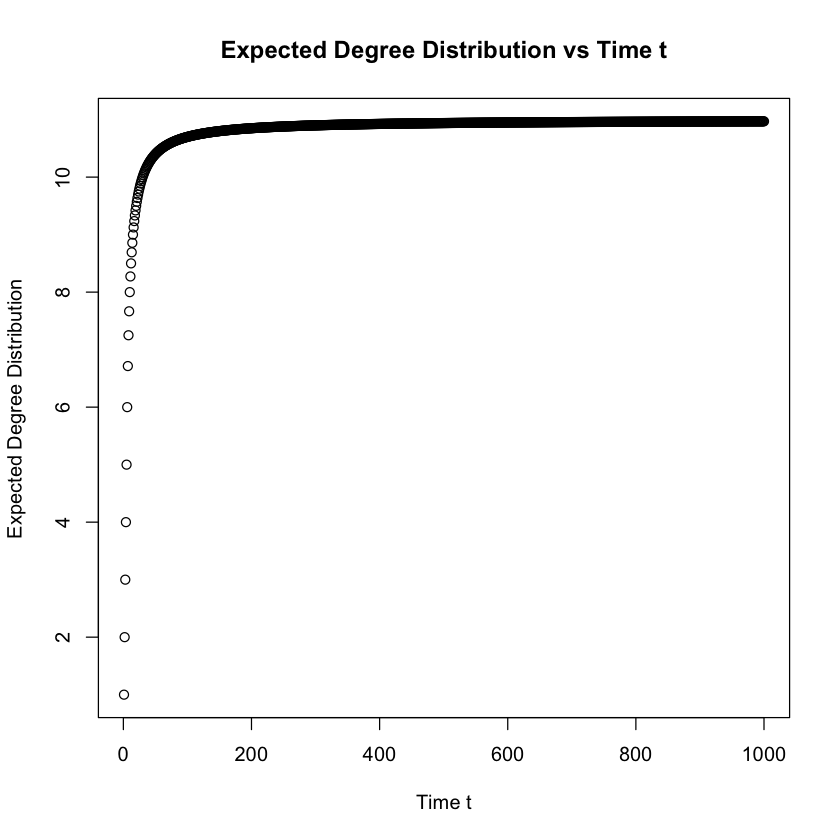

In [81]:
exp_deg_list = list()
for(i in 1:1000){
    temp_g = sample_pa(i, m=5, directed=FALSE)
    deg_dist = degree.distribution(temp_g)
    exp_deg = 0
    for(j in 1:length(deg_dist)){
        exp_deg = exp_deg + (j * deg_dist[j])
    }
    exp_deg_list = append(exp_deg_list, exp_deg)
}
time = c(1:1000)
plot(time, exp_deg_list, main="Expected Degree Distribution vs Time t", xlab="Time t", ylab="Expected Degree Distribution")

Approach from office hours:

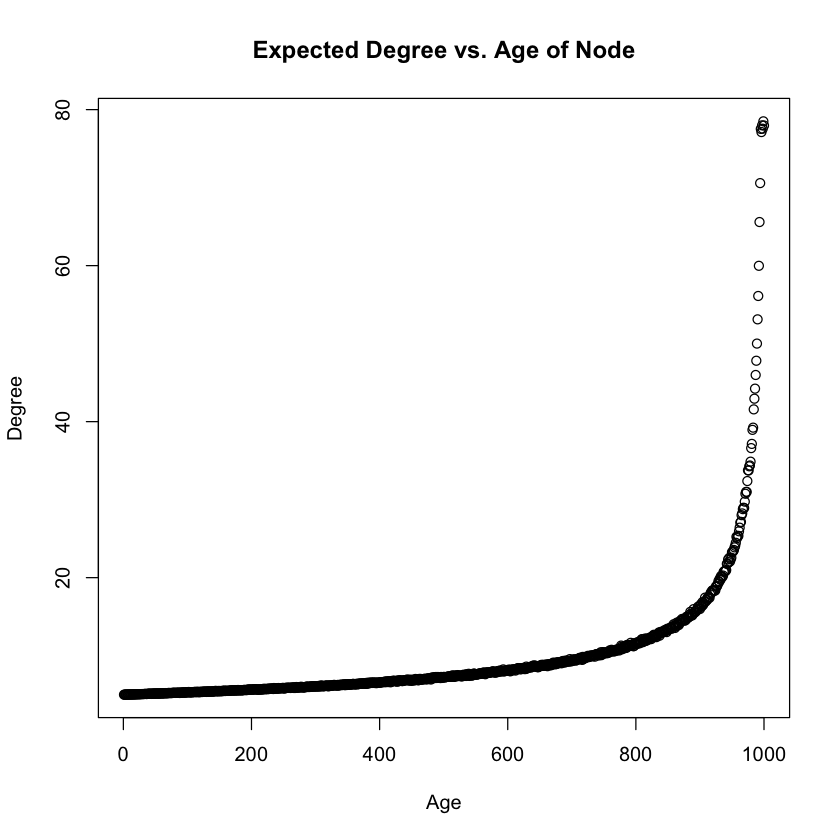

In [82]:
deg = rep(0,1000)
ages = c(1:1000)
for(i in ages){
    g = sample_pa(1000, m=5, directed=FALSE)
    deg = deg + degree(g)
}

deg = deg/1000
plot(rev(ages),deg,main="Expected Degree vs. Age of Node", xlab="Age", ylab="Degree")

(a): All of them are connected.  
(b and c):  
m=1: For n=1000, there are 34 groups with modulary of 0.93. For n=10000, there are 112 groups with modularity of 0.98.  
m=2: For n=1000, there are 20 groups with modulary of 0.52. For n=10000, there are 37 groups with modularity of 0.53.  
m=5: For n=1000, there are 11 groups with modularity of  0.27. For n=10000, there are 15 groups with modularity of 0.29.  
(d):  
m=1: For n=1000, the slope is around -2.71. For n=10000, the slope is around -3.03.  
m=2: For n=1000, the slope is around -2.16. For n=10000, the slope is around -2.55.  
m=5: For n=1000, the slope is around -2.38. For n=10000, the slope is around -2.17.  
(e):  
m=1: For n=1000, the slope is around -0.96. For n=10000, the slope is around -1.25.  
m=2: For n=1000, the slope is around -0.91. For n=10000, the slope is around -1.32.  
m=5: For n=1000, the slope is around -0.96. For n=10000, the slope is aorund -1.13.  
(f):  
m=1: The degree climbs up to around 20.
m=2: The degree climbs up to around 40.
m=5: The degree climbs up to around 80.

(h) Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

In [83]:
g = sample_pa(1000, m=1, directed=FALSE)
degseq = degree(g)
stub_g=sample_degseq(degseq)

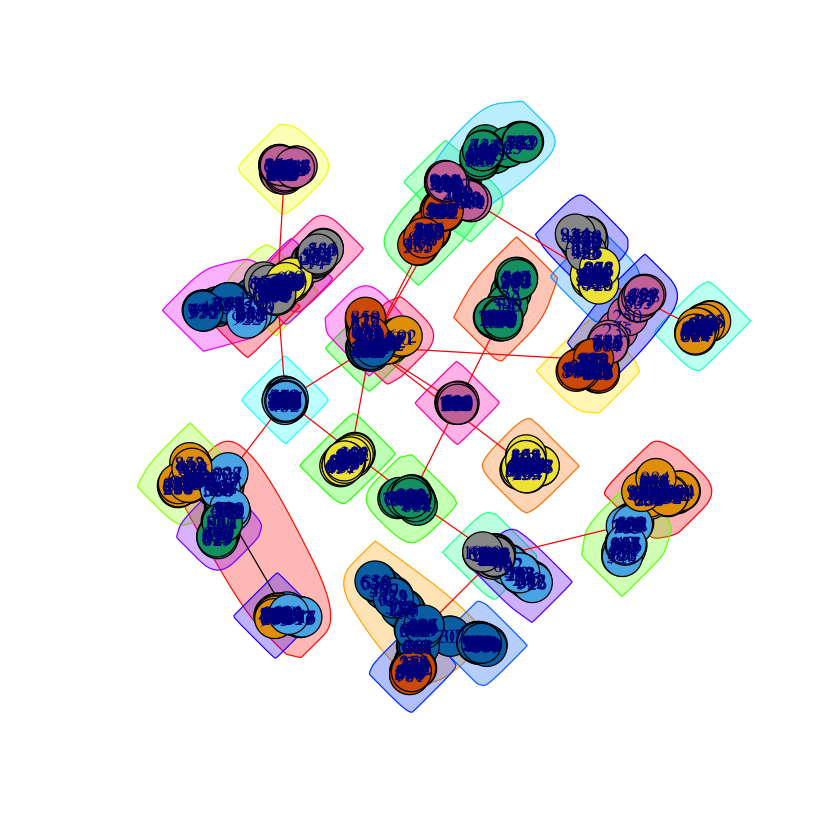

In [84]:
communities = cluster_fast_greedy(g)
plot(communities, g)

In [85]:
modularity(communities)

[1] 0.9329685

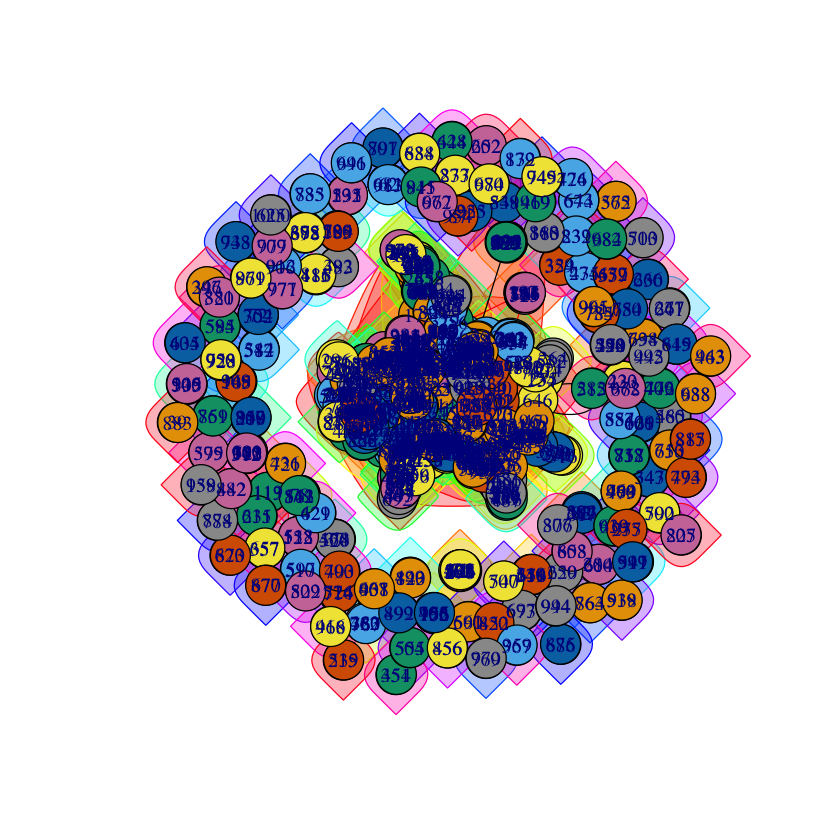

In [86]:
stub_comm=walktrap.community(stub_g)
plot(stub_comm, stub_g)

In [87]:
modularity(stub_comm)

[1] 0.7385799

Comparing the plots, the first procedure looks to be more organic where the clusters are more closely grouped together. For the second procedure, the graph looks more computationally generated from the stubs. The members of the groups are spread about throughout the graph.